In [1]:
import os 
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

parent_folder_output = "/home/abharadwaj1/dev/current_focus/refmac_50_iterations_analysis/refmac_with_halfmap_as_target"



In [2]:
fsc_cycles_halfmap1 = {}
fsc_cycles_halfmap2 = {}

for emdb_pdb in os.listdir(parent_folder_output):
    emdb_pdb_folder = os.path.join(parent_folder_output, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")

    fsc_cycles_halfmap1[emdb_pdb] = pd.read_pickle(os.path.join(emdb_pdb_folder, "fsc_average_halfmap_1_cycle50.pickle"))
    fsc_cycles_halfmap2[emdb_pdb] = pd.read_pickle(os.path.join(emdb_pdb_folder, "fsc_average_halfmap_2_cycle50.pickle"))




(0.45, 0.65)

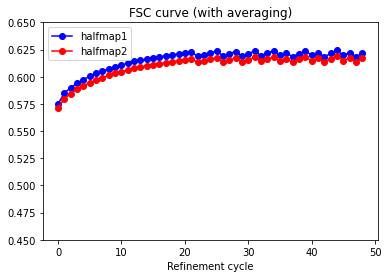

In [5]:
test_emdb_pdb = "3061_5a63"
fsc_average_curve_halfmap1 = [x[0] for x in fsc_cycles_halfmap1[test_emdb_pdb].values()] if test_emdb_pdb != "3061_5a63" else [x['masked'][1] for x in fsc_cycles_halfmap1[test_emdb_pdb].values()]
fsc_average_curve_halfmap2 = [x[0] for x in fsc_cycles_halfmap2[test_emdb_pdb].values()] if test_emdb_pdb != "3061_5a63" else [x['masked'][1] for x in fsc_cycles_halfmap2[test_emdb_pdb].values()]

plt.plot(fsc_average_curve_halfmap1, "bo-", label="halfmap1")
plt.plot(fsc_average_curve_halfmap2, "ro-", label="halfmap2")
plt.legend()
plt.title("FSC curve (with averaging)")
plt.xlabel("Refinement cycle")
plt.ylim(0.45, 0.65)


In [13]:
fsc_average_curve_halfmap1

[0.5750094643765858,
 0.5851157550153313,
 0.5899527608719342,
 0.5939553460675032,
 0.5973990268835734,
 0.6003682428898744,
 0.6029672035160343,
 0.6053082025420269,
 0.607359252651714,
 0.6092149484673756,
 0.6108448438050398,
 0.6124007090210174,
 0.61402927794903,
 0.6152560620122415,
 0.616366996485339,
 0.6173564022003581,
 0.6183498442366364,
 0.6192705831286706,
 0.620124672634067,
 0.6209993518983149,
 0.6217801219268411,
 0.622652184639653,
 0.6188142791254522,
 0.6203877830498026,
 0.6222320885749275,
 0.6233818274333404,
 0.6193355126603286,
 0.6210980121531522,
 0.6231790313057803,
 0.6190844839709031,
 0.62130429241944,
 0.6235783333079522,
 0.6194150734520525,
 0.6216648994406905,
 0.6239999503975319,
 0.6196375936232517,
 0.6219653034652224,
 0.6183348599257958,
 0.6213213169103275,
 0.6239714288400001,
 0.6195236119071375,
 0.6221501268692095,
 0.6182944330286462,
 0.6213827471837493,
 0.6242189865555772,
 0.6195892775237128,
 0.6222634394768269,
 0.6184027825865512,


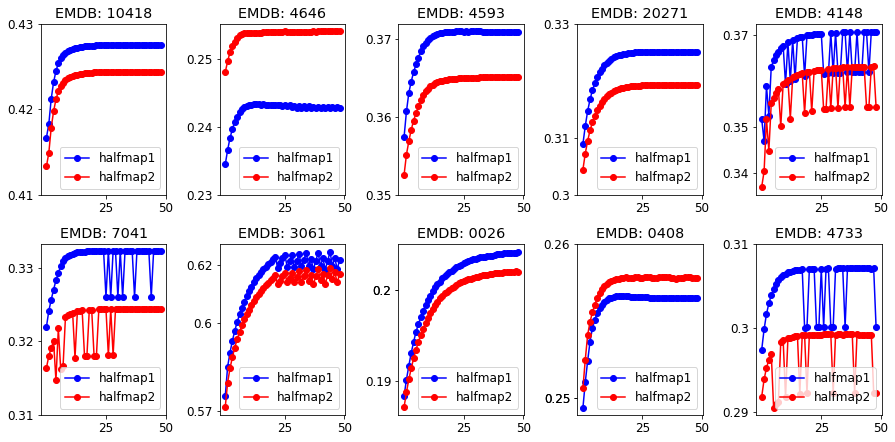

In [14]:
import random 
figsize_cm = (32, 16)
figsize_inch = (figsize_cm[0] / 2.54, figsize_cm[1] / 2.54)
# set font size to 4 
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(2, 5, figsize=figsize_inch)
sample_emdb_pdb = random.sample(list(fsc_cycles_halfmap1.keys()), 10)
# For ten random emdb-pdb pairs plot the fsc curves for halfmap1 and halfmap2 in separate subplots
# give the title of the plot as the emdb-pdb pair
fsc_halfmaps_emdb  = {}

for i, emdb_pdb in enumerate(sample_emdb_pdb):
    subplot_row = i // 5
    subplot_col = i % 5
    axis_to_plot = ax[subplot_row][subplot_col]

    emdb, pdb = emdb_pdb.split("_")
    fsc_cycle_curve_halfmap1 = [x[0] for x in fsc_cycles_halfmap1[emdb_pdb].values()] if emdb_pdb != "3061_5a63" else [x['masked'][1] for x in fsc_cycles_halfmap1[emdb_pdb].values()]
    fsc_cycle_curve_halfmap2 = [x[0] for x in fsc_cycles_halfmap2[emdb_pdb].values()] if emdb_pdb != "3061_5a63" else [x['masked'][1] for x in fsc_cycles_halfmap2[emdb_pdb].values()]

    fsc_halfmaps_emdb[emdb_pdb] = (fsc_cycle_curve_halfmap1, fsc_cycle_curve_halfmap2)
    
    axis_to_plot.plot(fsc_cycle_curve_halfmap1, "bo-", label="halfmap1")
    axis_to_plot.plot(fsc_cycle_curve_halfmap2, "ro-", label="halfmap2")
    axis_to_plot.set_title(f"EMDB: {emdb}")
    axis_to_plot.legend()
    # plot three y ticks
    y_max = max(max(fsc_cycle_curve_halfmap1), max(fsc_cycle_curve_halfmap2))
    y_min = min(min(fsc_cycle_curve_halfmap1), min(fsc_cycle_curve_halfmap2))
    y_mean = (y_max + y_min) / 2
    y_ticks = [round(y_min, 2), round(y_mean, 2), round(y_max, 2)]
    axis_to_plot.set_yticks(y_ticks)
    axis_to_plot.set_yticklabels(y_ticks)

    x_ticks = [25, 50]
    axis_to_plot.set_xticks(x_ticks)
    axis_to_plot.set_xticklabels(x_ticks)



fig.tight_layout()




In [25]:
fsc_max_difference = {}
for emdb_pdb in fsc_cycles_halfmap1.keys():
    fsc_cycle_curve_halfmap1 = [x[0] for x in fsc_cycles_halfmap1[emdb_pdb].values()] if emdb_pdb != "3061_5a63" else [x['masked'][1] for x in fsc_cycles_halfmap1[emdb_pdb].values()]

    # Find the maximum amplitude of oscillation in the fsc curve halfmap1
    max_diff = 0
    for i in range(1, len(fsc_cycle_curve_halfmap1)):
        if fsc_cycle_curve_halfmap1[i] < fsc_cycle_curve_halfmap1[i-1]:
            fsc_difference = fsc_cycle_curve_halfmap1[i-1] - fsc_cycle_curve_halfmap1[i]
        else:
            fsc_difference = 0
            
        if fsc_difference > max_diff:
            max_diff = fsc_difference

    fsc_max_difference[emdb_pdb] = max_diff


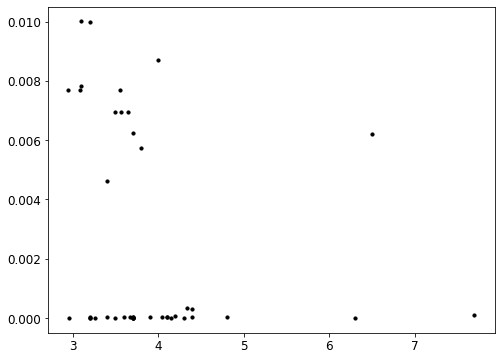

In [26]:
res_dict = {"3061" : 3.4, "0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

# Plot the resolution vs the maximum difference in the fsc curve
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
res_array = [res_dict[x.split("_")[0]] for x in fsc_max_difference.keys()]
max_diff_list = [fsc_max_difference[x] for x in fsc_max_difference.keys()]

ax.scatter(res_array, max_diff_list, color="black", s=10)

In [31]:
# emdb_pdb of all the maps with a max difference in the fsc curve > 0.002
outliers = [str((x,fsc_max_difference[x])) for x in fsc_max_difference.keys() if fsc_max_difference[x] > 0.002]
print("\n".join(outliers))

('0560_6nzu', 0.01000252577891858)
('10365_6t23', 0.007815839165796978)
('20259_6p62', 0.006944771909804248)
('4073_5lmn', 0.00769176561453766)
('4148_5m3m', 0.008702145612738688)
('4733_6r69', 0.006954565053038653)
('4759_6r8f', 0.005721979808480604)
('7090_6bf6', 0.006221283501012614)
('7041_6b3q', 0.006257575263112436)
('9374_6nhv', 0.00696379635423916)
('9112_6mgv', 0.010006157640597868)
('9935_6k7j', 0.007698826026312722)
('9941_6k7m', 0.007709119057468239)
('3061_5a63', 0.004629709031864326)


In [36]:
# emdb_pdb of all the maps with a max difference in the fsc curve > 0.002
outliers = [int(x.split("_")[0]) for x in fsc_max_difference.keys() if fsc_max_difference[x] > 0.002]
print("\n".join([str(x) for x in outliers]))

560
10365
20259
4073
4148
4733
4759
7090
7041
9374
9112
9935
9941
3061


In [33]:
print(len(outliers), len(fsc_max_difference.keys()), len(outliers)/len(fsc_max_difference.keys()))

14 42 0.3333333333333333


In [15]:
# fig.savefig("fsc_curves_10_sample.eps", dpi=600)


In [16]:
# # Compute FSC again 
# from locscale.include.emmer.ndimage.fsc_util import calculate_fsc_maps 
# refmac_iterations = np.arange(1, 51)
# output_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/figure_data/figure_1/mapdata_processing/overfitting_analysis/refmac_iteration_50"

# halfmap1_path = os.path.join(output_folder, "EMD-3061-half-1.map")
# halfmap2_path = os.path.join(output_folder, "EMD-3061-half-2.map")

# refined_modelmap_per_iteration = {k : os.path.join(output_folder,f"refined_model_map_{k}.mrc") for k in refmac_iterations}
# def compute_fsc_cycle(cycle):
#     refined_model_map = refined_modelmap_per_iteration[cycle]

#     print(refined_model_map)
#     print(halfmap1_path)
#     fsc_vals_halfmap1 = calculate_fsc_maps(refined_model_map, halfmap1_path)
#     fsc_vals_halfmap2 = calculate_fsc_maps(refined_model_map, halfmap2_path)

#     fsc_average_halfmap1 = (cycle, np.mean(fsc_vals_halfmap1), fsc_vals_halfmap1)
#     fsc_average_halfmap2 = (cycle, np.mean(fsc_vals_halfmap2), fsc_vals_halfmap2)

#     results = { 
#         "halfmap1" : fsc_average_halfmap1,
#         "halfmap2" : fsc_average_halfmap2
#     }
#     return results



In [17]:
# import joblib

# fsc_cycles_halfmap1 = {}
# fsc_cycles_halfmap2 = {}
# for cycle in refmac_iterations:
#     results = compute_fsc_cycle(cycle)
#     fsc_cycles_halfmap1[cycle] = results["halfmap1"]
#     fsc_cycles_halfmap2[cycle] = results["halfmap2"]

    


In [18]:
# halfmap1fsc = [x[1] for x in fsc_cycles_halfmap1.values()]
# halfmap2fsc = [x[1] for x in fsc_cycles_halfmap2.values()]

# plt.plot(halfmap1fsc, label="halfmap1")
# plt.plot(halfmap2fsc, label="halfmap2")
# plt.legend()

In [19]:
# fsc_cycles_halfmap1[test_emdb_pdb][1]['masked'][1]

In [20]:
# test_pickle_path = "/home/abharadwaj1/papers/elife_paper/figure_information/figure_data/figure_1/mapdata_processing/overfitting_analysis/fsc_average_halfmap2.pickle"

# test_fsc = pd.read_pickle(test_pickle_path)

# test_fsc.keys()